# Proyek Analisis Data: Simple Bike Sharing
- **Nama:** Cindy Steffani
- **Email:** cndysteff@gmail.com
- **ID Dicoding:** cndstf

## Background Bisnis


Sistem *bike sharing* adalah sistem penyewaan sepeda generasi baru yang memudahkan seluruh proses mulai dari keanggotaan, persewaan, dan pengembalian
kembali menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi
kembali pada posisi lain.

Berbeda dengan layanan transportasi lainnya seperti bus atau kereta bawah tanah, durasi
posisi perjalanan, keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem *bike sharing*. Fitur tersebut mengubah sistem *bike sharing* menjadi
jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Oleh karena itu, diharapkan menjadi hal yang paling penting
peristiwa di kota dapat dideteksi melalui pemantauan data ini.

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda dari tahun ke tahun?
2. Bagaimana pengaruh cuaca terhadap penggunaan sepeda?
3. Bagaimana penggunaan sepeda berdasarkan kondisi hari tertentu?
4. Bagaimana penggunaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

## Data Wrangling

### Gathering Data

Dataset yang digunakan adalah Bike Sharing dengan file day.csv dan hours.csv

In [2]:
days_df = pd.read_csv("https://raw.githubusercontent.com/cndystf/DataAnalyticsProject/main/data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/cndystf/DataAnalyticsProject/main/data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Tahapan ini berfungsi untuk menilai data baik dari tipe data, *missing values*, dan duplikasi.

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
days_df.duplicated().sum()

0

In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hours_df.duplicated().sum()

0

In [11]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Meskipun tidak ada *missing value* dan duplikasi pada kedua data, namun ada beberapa hal yang diubah supaya proses analisis lebih mudah dilakukan, di antaranya:
1.   Mengubah tipe data pada kolom dteday menjadi datetime
2.   Mengubah nilai pada cuaca, tahun, musim, bulan, dan hari
3.   Menghapus hours_df karena tidak relevan dengan pertanyaan bisnis yang telah ditentukan
4. Menyimpan dataset yang sudah dibersihkan

In [12]:
# ubah tipe data pada kolom dteday menjadi datetime
days_df['dteday'] = pd.to_datetime(days_df.dteday)

In [13]:
# ubah nilai pada cuaca
days_df['weathersit'] = days_df['weathersit'].map({
    1:'Clear/Partly Cloudy', 2:'Misty/Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'
})

# ubah nilai pada tahun
days_df['yr'] = days_df['dteday'].dt.year

# ubah nilai pada musim
days_df['season'] = days_df['season'].map ({
    1: 'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'
})

# ubah nilai pada bulan
days_df['mnth'] = days_df['dteday'].dt.month_name()

# ubah nilai pada hari
days_df['weekday'] = days_df['dteday'].dt.day_name()

In [14]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# hapus hours_df
del hours_df

In [16]:
# simpan dataset baru
days_df.to_csv("cleaned_bikesharingdays.csv", index=False)

## Exploratory Data Analysis (EDA)

Melakukan eksplorasi data days_df sesuai dengan pertanyaan bisnis yang telah ditentukan

1. Memastikan tipe data yang ada pada days_df setelah dilakukan perubahan

In [17]:
days_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

2. Mengelompokkan penyewa sepeda *casual* dan *registered*

In [18]:
registered_sum = days_df['registered'].sum()
casual_sum = days_df['casual'].sum()
count_sum = days_df['cnt'].sum()

print("Registered users:", registered_sum)
print("Casual users:", casual_sum)
print("Total users:", count_sum)

Registered users: 2672662
Casual users: 620017
Total users: 3292679


Berdasarkan hasil pengelompokkan, pengguna sewa sepeda yang *registered* lebih banyak dibandingkan *casual*. Adapun total dari keduanya terdapat pada kolom cnt.

3. Mengelompokkan penyewa sepeda *casual* dan *registered* berdasarkan bulan

In [19]:
days_df.groupby(by='mnth').agg({
    'cnt':['max','min','mean','sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Berdasarkan pengelompokkan penyewaan sepeda di atas, jumlah penyewaan sepeda terkecil terjadi di Januari mengacu pada nilai *max* dan *mean*. Sedangkan jumlah penyewaan sepeda terbesar ada di bulan Juni.

4. Mengelompokkan penyewa sepeda *casual* dan *registered* berdasarkan jenis hari (*weekday*)

In [20]:
days_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

Berdasarkan pengelompokkan penyewaan sepeda di atas, jumlah penyewaan sepeda terkecil terjadi di hari Minggu. Sedangkan jumlah penyewaan sepeda terbesar ada pada hari Jumat.

5. Mengelompokkan penyewa sepeda *casual* dan *registered* berdasarkan cuaca

In [21]:
days_df.groupby(by='weathersit').agg({
    'cnt':['max','min','mean','sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Selanjutnya, jumlah penyewaan sepeda terkecil terjadi saat cuaca salju/hujan ringan. Sedangkan jumlah penyewaan sepeda terbesar terjadi saat cuaca cerah/berawan sebagian.

6. Mengelompokkan penyewa sepeda *casual* dan *registered* berdasarkan musim

In [22]:
days_df.groupby(by='season').agg({
    'cnt':['max','min','mean']
})

cnt                   
         max   min         mean
season                         
Fall    8714  1115  5644.303191
Spring  7836   431  2604.132597
Summer  8362   795  4992.331522
Winter  8555    22  4728.162921

Terakhir, jumlah penyewaan sepeda terkecil terjadi pada musim Semi (*Spring*) Sedangkan jumlah penyewaan sepeda terbesar terjadi pada musim Gugur (*Fall*).

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penggunaan sepeda dari tahun ke tahun?


In [23]:
monthly_df = days_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_df = monthly_df.reset_index()

monthly_df= monthly_df.rename(columns={'dteday':'monthyear'})

monthly_df.head()

,monthyear,casual,registered,cnt
0,2011-01-31,3073,35116,38189
1,2011-02-28,6242,41973,48215
2,2011-03-31,12826,51219,64045
3,2011-04-30,22346,72524,94870
4,2011-05-31,31050,104771,135821


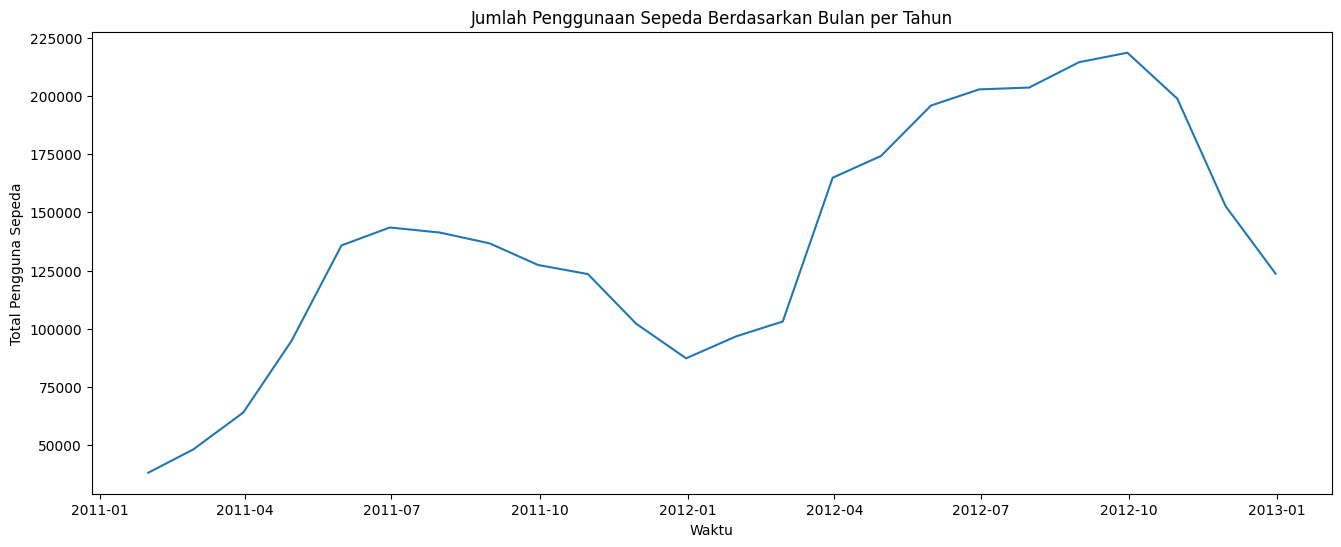

In [24]:
plt.figure(figsize=(16,6))

sns.lineplot(
    data=monthly_df,
    x='monthyear',
    y='cnt',
)

plt.title ("Jumlah Penggunaan Sepeda Berdasarkan Bulan per Tahun")
plt.xlabel('Waktu')
plt.ylabel('Total Pengguna Sepeda')
plt.show()

Berdasarkan grafik di atas, penyewaan sepeda tertinggi pada tahun 2011 terjadi saat bulan Juni dan yang terendah di bulan Januari. Terdapat peningkatan penyewaan sepeda yang terjadi saat memasuki tahun 2012 terutama di bulan September 2012.  

### Pertanyaan 2:
Bagaimana pengaruh cuaca terhadap penggunaan sepeda?

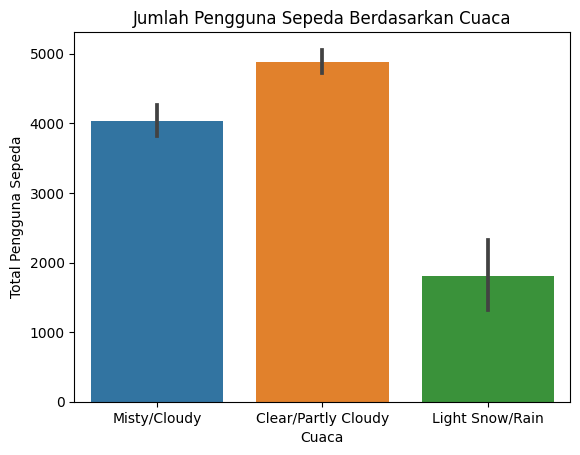

In [25]:
sns.barplot(
    data=days_df,
    x='weathersit',
    y='cnt'
)

plt.title('Jumlah Pengguna Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Total Pengguna Sepeda')
plt.show()

Berdasarkan grafik di atas, total penyewaan sepeda terkecil terjadi saat cuaca salju/hujan ringan. Sedangkan jumlah penyewaan sepeda terbesar terjadi saat cuaca cerah/berawan sebagian. Tidak ada yang menyewa sepeda saat cuaca salju/hujan berat.

### Pertanyaan 3:
Bagaimana penggunaan sepeda berdasarkan kondisi hari tertentu?

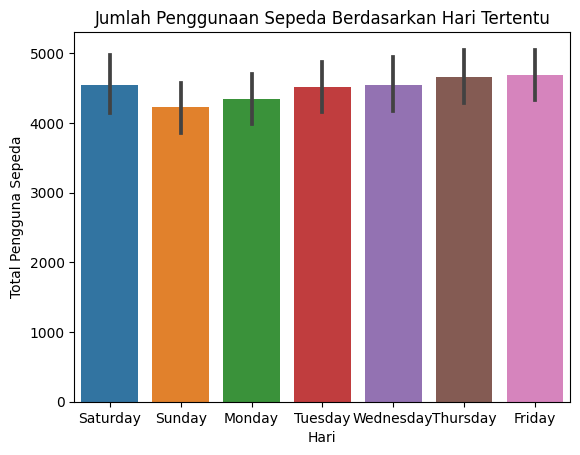

In [26]:
sns.barplot(
    data=days_df,
    x='weekday',
    y='cnt'
)

plt.title('Jumlah Penggunaan Sepeda Berdasarkan Hari Tertentu')
plt.xlabel('Hari')
plt.ylabel('Total Pengguna Sepeda')
plt.show()

Berdasarkan grafik di atas, jumlah penyewaan sepeda terkecil terjadi di hari Minggu. Sedangkan jumlah penyewaan sepeda terbesar ada pada hari Jumat.

### Pertanyaan 4:
Bagaimana penggunaan sepeda berdasarkan musim?

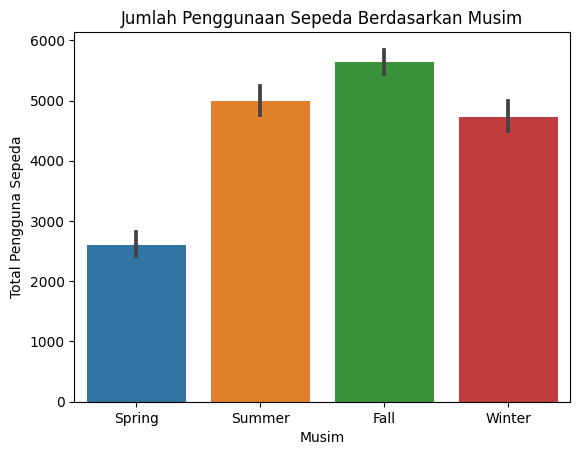

In [27]:
sns.barplot(
    data=days_df,
    x='season',
    y='cnt'
)

plt.title('Jumlah Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna Sepeda')
plt.show()

Berdasarkan grafik di atas, jumlah penyewaan sepeda terendah ada pada musim Semi. Sedangkan jumlah penyewaan sepeda terbanyak ada pada musim Gugur.

# Conclusion

1. Bagaimana tren penggunaan sepeda dari tahun ke tahun?
Answer : Jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat pada pertengahan tahun (contoh: bulan September 2012) dan menurun pada awal dan akhir tahun.

2. Bagaimana pengaruh cuaca terhadap penggunaan sepeda?
Answer : Penyewaan sepeda naik jika cuaca sedang cerah/sebagian berawan namun sedikit jika cuaca salju/hujan ringan. Sedangkan untuk kondisi cuaca buruk seperti salju/hujan berat/badai, tidak ada yang menyewa sepeda.

3. Bagaimana penggunaan sepeda berdasarkan kondisi hari tertentu?
Answer : Jumlah penyewaan sepeda terkecil terjadi di hari Minggu. Sedangkan jumlah penyewaan sepeda terbesar ada pada hari Jumat. Hal tersebut menunjukkan bahwa penyewa lebih menyukai hari biasa/*weekday* untuk menyewa sepeda dibandingkan hari libur/*weekend*.

4. Bagaimana penggunaan sepeda berdasarkan musim?
Answer : Jumlah penyewaan sepeda terendah terjadi saat musim Semi. Sedangkan jumlah penyewaan sepeda terbanyak terjadi saat musim Gugur.